<center>

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/%D0%9B%D0%9E%D0%93%D0%9E_%D0%A8%D0%90%D0%94.png" width=300px/>

<h2>Python: модули, пакеты и система импорта</h2>
<h3>Ярослав Золотарёв</h3>
<br />
<h4>2025</h4>

</center>

# Модули

## Базовый пример [happy_0]

Базовый сценарий. Спрятать часть функций/имен в отдельный файл. Создадим файл happy_0.py в директории рядом с нашим ноутбуком

In [1]:
%%file happy_0.py
"""I am a happy module"""

foo = 'foobar'

def bar():
    return foo

print('Happy module is running!!')

Overwriting happy_0.py


In [2]:
!ls

ModulesPackagesImport.ipynb  dist	 mypack.egg-info  setup.py
__pycache__		     examples	 pyproject.toml
build			     happy_0.py  rise.css
builtins_demo.py	     mypack	 setup.cfg


In [3]:
import happy_0

Happy module is running!!


В момент импорта файл запускается целиком. То, что написано - выполняется

In [4]:
happy_0.bar()

'foobar'

In [5]:
exit()

In [ ]:
from happy_0 import foo, bar
# не рекомендуется писать  from happy_0 import *

: 

: 

: 

Happy module is running!!


In [2]:
foo

'foobar'

In [3]:
bar()

'foobar'

Про перезагрузку модулей можно прочитать [тут](https://realpython.com/lessons/reloading-module/) - `importlib`, etc...

## Откуда модуль импортируется

In [ ]:
exit()

: 

In [1]:
import numpy as np

In [2]:
np.__file__

'/mnt/d/Git_shit_2/prep/private-2025/.venv/lib/python3.13/site-packages/numpy/__init__.py'

In [3]:
import sys
print(sys.path)

['/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python313.zip', '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13', '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13/lib-dynload', '', '/mnt/d/Git_shit_2/prep/private-2025/.venv/lib/python3.13/site-packages']


In [4]:
!which python

/mnt/d/Git_shit_2/prep/private-2025/.venv/bin/python


In [5]:
!ls -l '/mnt/d/Git_shit_2/prep/private-2025/.venv/bin/python'

lrwxrwxrwx 1 qc7 qc7 79 Sep 14 14:45 /mnt/d/Git_shit_2/prep/private-2025/.venv/bin/python -> /home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/bin/python3.13


Создадим файл examples/happy.py

In [6]:
%%file examples/happy.py
"""I am a happy module"""

from IPython import display

foo = display.HTML('<img src="https://media.tenor.com/VGWpu8FH82AAAAAM/happy-cat-yippee-cat.gif">')

def bar():
    return foo

print('Happy module is running!!')

Overwriting examples/happy.py


Любой файл с расширением .py, содержащий python-код, является модулем, его можно импортировать. Требуется импортировать модуль 

In [7]:
import happy

ModuleNotFoundError: No module named 'happy'

In [8]:
# Добавим папку examples
import sys
sys.path.insert(0, "examples")
sys.path

['examples',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python313.zip',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13/lib-dynload',
 '',
 '/mnt/d/Git_shit_2/prep/private-2025/.venv/lib/python3.13/site-packages']

In [9]:
import happy
happy.bar()

Happy module is running!!


При импорте содержимое модуля исполняется, результат кешируется

При импорте модуля создаётся объект типа module, его пространство имён наполняется содержимым модуля и специальными атрибутами:

In [10]:
print(happy)
print(type(happy))

<module 'happy' from '/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/examples/happy.py'>
<class 'module'>


In [11]:
dir(happy)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bar',
 'display',
 'foo']

In [12]:
print(f'{happy.__name__}')
print(f'{happy.__doc__}')
print(f'{happy.__file__}')

happy
I am a happy module
/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/examples/happy.py


При запуске модуля как скрипта специальная переменная `__name__` будет иметь значение `"__main__"`.

In [13]:
%%file examples/happytest.py
import happy

def test():
    assert happy.bar() == happy.foo

if __name__ == "__main__":
    print('Running test')
    test()
    print('OK')    

Overwriting examples/happytest.py


In [14]:
!which python

/mnt/d/Git_shit_2/prep/private-2025/.venv/bin/python


In [15]:
!python examples/happytest.py

Happy module is running!!
Running test
OK


In [16]:
__name__

'__main__'

<div class="alert alert-danger">
    <b>Антипаттерн:</b> объекты из <code>if __name__ == "__main__":</code> утекают в глобальное пространство имён
</div>

Пример общеизвестной библиотеки с анти-паттерном: [pyTelegrambotApi](https://github.com/eternnoir/pyTelegramBotAPI/blob/master/telebot/__init__.py)

In [17]:
%%file examples/nameleak.py

def foo():
    print(message)

print(f'The module name is `{__name__}`')
if __name__ == "__main__":
    print('Running test...')
    message = 'I just leaked to global namespace'
    foo()

Overwriting examples/nameleak.py


In [18]:
!python examples/nameleak.py

The module name is `__main__`
Running test...
I just leaked to global namespace


In [19]:
import examples.nameleak

The module name is `examples.nameleak`


Рекомендуем делать функцию `main()` и вызывать её в блоке `if __name__ == "__main__"`.
Например:
```
def main():
    message = ....
    arguments = argparse...
    ....

if __name__ == "__main__":
    main()
```


 Импортировать модули можно по-разному

In [20]:
import numpy
import numpy, pandas, requests  # bad style
import numpy as np
from numpy import absolute, array
from numpy import absolute as abs, array  # bad style
from numpy import absolute as _abs, array
from numpy import (
    einsum, minimum, maximum,
    sqrt, exp, sin, cos, tan,
    log, log10, log2, log1p,
    sinh, cosh, tanh, arcsin, arccos, arctan,
    arctan2, hypot, degrees, radians,
    pi, e, inf, nan,
)  
from numpy import *  # bad practice
from examples import happy
from examples.happytest import test

# Bottom two will work in larger module but not in Jupyter
# from .examples import happy 
# from .examples.happytest import test  

Happy module is running!!


### Style guide
* Все импорты в начале модуля
* Сначала `import`, потом `from ... import`
* Отсортированы в лексикографическом порядке
* Разбиты на 3 группы:
  - Импорты модулей стандартной библиотеки
  - Импорты сторонних библиотек
  - Собственные импорты
 
Где описано
* https://www.python.org/dev/peps/pep-0008/#imports
* https://google.github.io/styleguide/pyguide.html#s2.2-imports

Пример, как надо:

```python
import dataclasses
import types
import pathlib
from pathlib import Path  # bad style according to google

import numpy
import pytest

from .codeops import count_operations
```

`from <name> import *` импортирует все имена из модуля, кроме тех что начинаются с `_`

In [21]:
%%file examples/circle.py
from math import pi as _pi

some_string = 'some_string'

def get_circumference(radius):
    return 2 * _pi * radius

Overwriting examples/circle.py


In [22]:
from circle import *
assert '_pi' not in globals()
get_circumference(1)
print(some_string)

some_string


Список импортируемых через `*` имён можно кастомизировать с помощью переменной `__all__`

In [23]:
%%file examples/allstar.py

x = 100
y = 200
_z = 300

__all__ = ['x', '_z']

Overwriting examples/allstar.py


In [24]:
from allstar import *
print(x, _z)
assert 'y' not in globals()

100 300


При первом импорте модуля его содержимое компилируется и кешируется в файле с расширением `.pyc`. Это нужно для ускорения повторной загрузки модуля при следующих запусках.   

In [25]:
happy.__cached__

'/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/examples/__pycache__/happy.cpython-313.pyc'

При изменении кода модуля он перекомпилируется при следующем запуске.

... Но не в `ipython`. Для него нужно прописать:

```python
%load_ext autoreload
%autoreload 2
```

In [26]:
import math
math.__file__

AttributeError: module 'math' has no attribute '__file__'

In [27]:
import sys
'math' in sys.builtin_module_names

True

In [28]:
'os' in sys.builtin_module_names

False

In [29]:
import os
os.__file__

'/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13/os.py'

При импорте модуля `<name>`, интерпретатор ищет файл `<name>.py` в списке директорий `sys.path`.

* `sys.path` включает текущую директорию
* Зависит от окружения, модифицируется в модуле `site`, содержит путь к `site-packages`
* Можно кастомизировать с помощью переменной окружения PYTHONPATH
* Можно менять в рантайме

In [30]:
import sys
sys.path

['examples',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python313.zip',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13',
 '/home/qc7/.local/share/uv/python/cpython-3.13.7-linux-x86_64-gnu/lib/python3.13/lib-dynload',
 '',
 '/mnt/d/Git_shit_2/prep/private-2025/.venv/lib/python3.13/site-packages']

Циклические импорты

In [31]:
%%file examples/cycle_foo.py
from cycle_bar import xyz

abc = 100

Overwriting examples/cycle_foo.py


In [32]:
%%file examples/cycle_bar.py
from cycle_foo import abc

xyz = 100

Overwriting examples/cycle_bar.py


In [33]:
import examples.cycle_foo

ImportError: cannot import name 'xyz' from partially initialized module 'cycle_bar' (most likely due to a circular import) (/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/examples/cycle_bar.py)

Что делать с циклическими импортами?

* Вынести общую функциональность в отдельный модуль
* Забить на pep8!
  - Спрятать вызов внутрь функции, где он используется
  - Поставить импорт в конец

In [34]:
%%file examples/cycle_foo.py
 
abc = 100
from cycle_bar import xyz

Overwriting examples/cycle_foo.py


In [35]:
import cycle_foo

# Пакеты

* Пакеты == директории с модулями
* Позволяют строить иерархии модулей и лучше структурировать код
* Любая директория с файлом `__init__.py` является пакетом

In [36]:
!tree --dirsfirst mypack

mypack
├── __pycache__
│   ├── __init__.cpython-313.pyc
│   └── foo.cpython-313.pyc
├── bar
│   ├── __pycache__
│   │   ├── __init__.cpython-313.pyc
│   │   ├── __main__.cpython-313.pyc
│   │   └── spam.cpython-313.pyc
│   ├── __init__.py
│   ├── __main__.py
│   └── spam.py
├── __init__.py
└── foo.py

3 directories, 10 files


In [37]:
%%file mypack/__init__.py
"""I am empty"""
print("__init__.py was just loaded")

Overwriting mypack/__init__.py


In [38]:
import mypack
mypack  # импортируется только __init__.py!

__init__.py was just loaded


<module 'mypack' from '/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/mypack/__init__.py'>

In [39]:
mypack.foo

AttributeError: module 'mypack' has no attribute 'foo'

Модули, входящие в пакет, нужно импортировать явно

In [40]:
import mypack.foo

In [41]:
mypack.foo.__name__

'mypack.foo'

В `__init__.py` можно производить инициализацию пакета. Полезны относительные импорты.

In [42]:
%%file mypack/bar/__init__.py
from . import spam
from .. import foo

__all__ = ['spam', 'foo']

Overwriting mypack/bar/__init__.py


In [43]:
from mypack.bar import *
print(spam.__name__)
print(foo.__name__)

mypack.bar.spam
mypack.foo


<div class="alert alert-danger">
<b>Антипаттерн:</b> реализовывать логику в  __init__.py
</div>

In [44]:
%%file mypack/bar/__init__.py
from . import spam
from .. import foo

def abs(a):
    return abs(a)

__all__ = ['spam', 'foo', 'abs']

Overwriting mypack/bar/__init__.py


In [45]:
!python mypack.bar

python: can't open file '/mnt/d/Git_shit_2/prep/private-2025/06.1.ModulesPackagesImport/lecture/mypack.bar': [Errno 2] No such file or directory


Пакеты можно исполнять как скрипты. Для этого нужен файл `__main__.py`
* Полезно при разработке пайплайнов

In [46]:
%%file mypack/bar/__main__.py
print("Hello from bar.__main__!")

Overwriting mypack/bar/__main__.py


In [47]:
!python -m mypack.bar

__init__.py was just loaded
Hello from bar.__main__!


# Распространение пакетов


Ссылки про сборку и установку пакетов

- https://docs.python.org/3/installing/index.html
- https://docs.python.org/3/distributing/index.html
- https://packaging.python.org/

In [48]:
!which pip3

/home/qc7/.pyenv/shims/pip3


In [54]:
!cd ../.. && uv run python -m ensurepip

⠹  (4/4)                                                                        Uninstalled 1 package in 1.46s
░░░░░░░░░░░░░░░░░░░░ [0/8] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 8 packages in 3.32s                               
Looking in links: /tmp/tmpunh0byeb
Processing /tmp/tmpunh0byeb/pip-25.2-py3-none-any.whl


In [57]:
# !pip3 install --upgrade --force-reinstall  numpy
# !uv pip install --upgrade --force-reinstall  numpy
!../../.venv/bin/pip3 install --upgrade --force-reinstall  numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 49.4 MB/s  0:00:00eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 2.3.4 which is incompatible.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 2.3.4 which is incompatible.


https://setuptools.pypa.io/en/latest/userguide/declarative_config.html

Why setup.py is old: [setup.py vs setup.cfg in Python](https://towardsdatascience.com/setuptools-python-571e7d5500f2)

In [58]:
%%file setup.cfg
[metadata]
name = mypack
version = 0.2.0
author=Dmitry Brazhenko & Konstantin Chernyshev
description = An awesome package that does something
keywords = one, two
license = BSD 3-Clause License
classifiers =
    Programming Language :: Python :: 3
    Programming Language :: Python :: 3.9
   
[options]
packages = find:
install_requires =
    requests

Overwriting setup.cfg


"PEP 517 doesn’t support editable installs so this is currently incompatible with  
`pip install -e`"

In [59]:
%%file setup.py
from setuptools import setup

setup()

Overwriting setup.py


А чем собирать? 

pyproject.toml 
* https://www.python.org/dev/peps/pep-0518/
* https://snarky.ca/what-the-heck-is-pyproject-toml/
* https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/
* https://packaging.python.org/en/latest/specifications/declaring-project-metadata/#declaring-project-metadata
* https://ianhopkinson.org.uk/2022/02/understanding-setup-py-setup-cfg-and-pyproject-toml-in-python/

https://www.python.org/dev/peps/pep-0518/#configparser
    

```
[build]
requires =
    setuptools
    wheel>=0.27
```

In [60]:
%%file pyproject.toml
[build-system]
requires = ["setuptools", "wheel>=0.27"]
build-backend = "setuptools.build_meta"

Overwriting pyproject.toml


А может туда ещё и метадату запихнём? 

https://www.python.org/dev/peps/pep-0621/

### Wheels
https://www.python.org/dev/peps/pep-0427/  
https://www.python.org/dev/peps/pep-0491/  

In [61]:
!python setup.py sdist bdist_wheel

running sdist
running egg_info
writing mypack.egg-info/PKG-INFO
writing dependency_links to mypack.egg-info/dependency_links.txt
writing requirements to mypack.egg-info/requires.txt
writing top-level names to mypack.egg-info/top_level.txt
reading manifest file 'mypack.egg-info/SOURCES.txt'
writing manifest file 'mypack.egg-info/SOURCES.txt'

running check
creating mypack-0.2.0
creating mypack-0.2.0/mypack
creating mypack-0.2.0/mypack.egg-info
creating mypack-0.2.0/mypack/bar
copying files to mypack-0.2.0...
copying pyproject.toml -> mypack-0.2.0
copying setup.cfg -> mypack-0.2.0
copying setup.py -> mypack-0.2.0
copying mypack/__init__.py -> mypack-0.2.0/mypack
copying mypack/foo.py -> mypack-0.2.0/mypack
copying mypack.egg-info/PKG-INFO -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/SOURCES.txt -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/dependency_links.txt -> mypack-0.2.0/mypack.egg-info
copying mypack.egg-info/requires.txt -> mypack-0.2.0/mypack.egg-info
copying

In [62]:
!tree -I "__pycache__|examples|*.ipynb|*.css"

.
├── build
│   ├── bdist.linux-x86_64
│   └── lib
│       └── mypack
│           ├── __init__.py
│           ├── bar
│           │   ├── __init__.py
│           │   ├── __main__.py
│           │   └── spam.py
│           └── foo.py
├── builtins_demo.py
├── dist
│   ├── mypack-0.2.0-py3-none-any.whl
│   └── mypack-0.2.0.tar.gz
├── happy_0.py
├── mypack
│   ├── __init__.py
│   ├── bar
│   │   ├── __init__.py
│   │   ├── __main__.py
│   │   └── spam.py
│   └── foo.py
├── mypack.egg-info
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   ├── dependency_links.txt
│   ├── requires.txt
│   └── top_level.txt
├── pyproject.toml
├── setup.cfg
└── setup.py

9 directories, 22 files


In [63]:
!tar -ztvf dist/mypack-0.2.0.tar.gz

drwxr-xr-x qc7/qc7           0 2025-10-23 15:20 mypack-0.2.0/
-rw-r--r-- qc7/qc7         317 2025-10-23 15:20 mypack-0.2.0/PKG-INFO
drwxr-xr-x qc7/qc7           0 2025-10-23 15:20 mypack-0.2.0/mypack/
-rwxr--r-- qc7/qc7          54 2025-10-23 15:13 mypack-0.2.0/mypack/__init__.py
drwxr-xr-x qc7/qc7           0 2025-10-23 15:20 mypack-0.2.0/mypack/bar/
-rwxr--r-- qc7/qc7         103 2025-10-23 15:14 mypack-0.2.0/mypack/bar/__init__.py
-rwxr--r-- qc7/qc7          34 2025-10-23 15:14 mypack-0.2.0/mypack/bar/__main__.py
-rwxr--r-- qc7/qc7           0 2025-08-30 14:03 mypack-0.2.0/mypack/bar/spam.py
-rwxr--r-- qc7/qc7           0 2025-08-30 14:03 mypack-0.2.0/mypack/foo.py
drwxr-xr-x qc7/qc7           0 2025-10-23 15:20 mypack-0.2.0/mypack.egg-info/
-rw-r--r-- qc7/qc7         317 2025-10-23 15:20 mypack-0.2.0/mypack.egg-info/PKG-INFO
-rw-r--r-- qc7/qc7         280 2025-10-23 15:20 mypack-0.2.0/mypack.egg-info/SOURCES.txt
-rw-r--r-- qc7/qc7           1 2025-10-23 15:20 mypack-0.2.0/mypack.eg

In [64]:
!unzip -l dist/mypack-0.2.0-py3-none-any.whl

Archive:  dist/mypack-0.2.0-py3-none-any.whl
  Length      Date    Time    Name
---------  ---------- -----   ----
       54  2025-10-23 13:13   mypack/__init__.py
        0  2025-08-30 12:03   mypack/foo.py
      103  2025-10-23 13:14   mypack/bar/__init__.py
       34  2025-10-23 13:14   mypack/bar/__main__.py
        0  2025-08-30 12:03   mypack/bar/spam.py
      317  2025-10-23 13:20   mypack-0.2.0.dist-info/METADATA
       91  2025-10-23 13:20   mypack-0.2.0.dist-info/WHEEL
        7  2025-10-23 13:20   mypack-0.2.0.dist-info/top_level.txt
      659  2025-10-23 13:20   mypack-0.2.0.dist-info/RECORD
---------                     -------
     1265                     9 files


### Eggs
https://www.python.org/dev/peps/pep-0376/

In [65]:
!python setup.py install
#pip install -e . 

running install
/mnt/d/Git_shit_2/prep/private-2025/.venv/lib/python3.13/site-packages/setuptools/_distutils/cmd.py:90: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        By 2025-Oct-31, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
running build
running build_py
copying mypack/foo.py -> build/lib/mypack
copying mypack/__init__.py -> build/lib/mypack
copying mypack/bar/spam.py -> build/lib/mypack/bar
copying mypack/bar/__init__.py -> build/lib/mypack/bar
copying m

In [66]:
!tree -I "__pycache__|examples|*.ipynb|*.css"

.
├── build
│   ├── bdist.linux-x86_64
│   └── lib
│       └── mypack
│           ├── __init__.py
│           ├── bar
│           │   ├── __init__.py
│           │   ├── __main__.py
│           │   └── spam.py
│           └── foo.py
├── builtins_demo.py
├── dist
│   ├── mypack-0.2.0-py3-none-any.whl
│   └── mypack-0.2.0.tar.gz
├── happy_0.py
├── mypack
│   ├── __init__.py
│   ├── bar
│   │   ├── __init__.py
│   │   ├── __main__.py
│   │   └── spam.py
│   └── foo.py
├── mypack.egg-info
│   ├── PKG-INFO
│   ├── SOURCES.txt
│   ├── dependency_links.txt
│   ├── requires.txt
│   └── top_level.txt
├── pyproject.toml
├── setup.cfg
└── setup.py

9 directories, 22 files


### Egg vs Wheel 

> The Egg format was introduced by setuptools in 2004, whereas the Wheel format was introduced by PEP 427 in 2012.


https://packaging.python.org/discussions/wheel-vs-egg/

> * Wheel has an official PEP. Egg did not.
> * Wheel distribution format, Egg - distribution format and a runtime installation format

## PyPI
The Python Package Index

https://pypi.org/

Разработчики библиотек публикуют wheel'ы на PyPI

> ```bash
pip install Faker
```

In [67]:
!uv pip uninstall Faker

Using Python 3.13.7 environment at: /mnt/d/Git_shit_2/prep/private-2025/.venv
Uninstalled 1 package in 5.39s
 - faker==37.11.0


In [68]:
!uv pip install Faker

Using Python 3.13.7 environment at: /mnt/d/Git_shit_2/prep/private-2025/.venv
Resolved 2 packages in 139ms                                         
░░░░░░░░░░░░░░░░░░░░ [0/1] Installing wheels...                                 warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 3.00s                                
 + faker==37.11.0


# Система импорта

Функция `__import__` имеет side-effect: загруженный модуль кешируется в словаре `sys.modules`

In [69]:
import sys
sys.modules['sys'] is sys

True

* При повторном импорте возвращается объект из `sys.modules`.
* При импорте модуля в разных частях программы вы получите один и тот же объект.
* Благодаря этому свойству модули можно использовать как синглтоны.
* Для перезагрузки модулей в интерактивном режиме есть `importlib.reload`, так же ipython-магия `%autoreload`.



Пример:
```
# тут установлен numpy версии 1
import numpy
# тут вы обновили numpy до версии 2, но не перезапустили kernel в jupyter
import numpy # <- numpy останется на версии 1
```

Хардкорный доклад Дэвида Бизли про систему импорта в питоне, на 200 слайдов!

http://www.dabeaz.com/modulepackage/

In [70]:
%%file builtins_demo.py
import builtins

def foo():
    print('I am imported!')
    print(f'{__builtins__ is builtins}')
    print(f'{__builtins__ is builtins.__dict__}')

if __name__ == '__main__':
    print('I am main module!')
    print(f'{__builtins__ is builtins}')
    print(f'{__builtins__ is builtins.__dict__}')

Overwriting builtins_demo.py


In [71]:
!python builtins_demo.py

I am main module!
True
False


In [72]:
!python -c 'from builtins_demo import foo; foo()'

I am imported!
False
True


# Бонус 1: консольные утилиты из Python-пакетов


* При установке библиотеки добавить "console entry_point". [Пример](https://python-packaging.readthedocs.io/en/latest/command-line-scripts.html)
* Для считывания входных аргументов можно исопльзовать [Cyclopts](https://github.com/BrianPugh/cyclopts), [Typer](https://towardsdatascience.com/typer-probably-the-simplest-to-use-python-command-line-interface-library-17abf1a5fd3e), [Click](https://click.palletsprojects.com/en/8.1.x/arguments/), Argparse

# Бонус 2: ipywidgets для аналитических библиотек

[Коллекция примеров](https://github.com/jupyter-widgets/ipywidgets/tree/master/docs/source/examples)

* Полезная тулза при разработке аналитических и jupyter-ориентированных библиотек

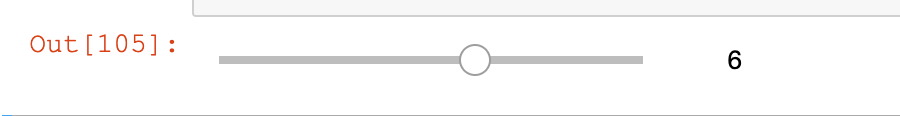